# Project Name: Data Science Minor Project  by Vaishnavi.R


#  Problem Statement : Create a classification model to predict the gender(male or female) based on different acoustic parametrers.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [6]:
df=pd.read_csv('voice.csv')
df.head(10) #Displays First 10 Rows.

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,male
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,male
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,...,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,male


In [8]:
df.shape # Displays number of Rows and Columns.

(3168, 21)

# 1) Remove/handle null values (if any). 

In [12]:
# Displays all Informations about datatype,non-null and columns.
df.info()
df.isnull().sum() # Displays count of null values if any present.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [10]:
df.describe() #describing the given data.

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [13]:
df.duplicated().sum()

2

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

0

# 2)Depict percentage distribution of label on a pie chart

In [20]:
d1=df['label'].value_counts()

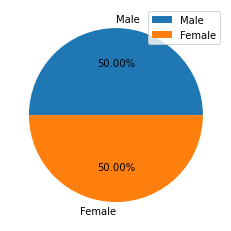

In [32]:
Mylabels=['Male','Female']
plt.pie(x=d1,autopct='%.2f%%',labels=Mylabels)
plt.legend()
plt.show()


# 3) Considering all the features as independent feature and label as dependent feature,split the dataset training and testing data with test size=20%.



In [36]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2532, 20)
(634, 20)
(2532,)
(634,)


# 4)Apply the following classifier models on training dataset and generate predictions for the test dataset


# a. Decision Tree Classifier<br>b. Random Forest Classifier<br>c. KNN Classifier<br>d. Logistic Regression<br>e. SVM Classifier<br>





# 1) SVM Classifier

In [47]:
# SVM Classifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
m1=SVC(kernel='linear',C=1)
m1.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [48]:
print('Traing Score',m1.score(x_train,y_train))
print('Traing Score',m1.score(x_test,y_test))

Traing Score 0.9210110584518167
Traing Score 0.9305993690851735


# 2) Decision Tree Classifier

In [52]:
# Decision trees
from sklearn.tree import DecisionTreeClassifier
m2=DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_split=12)
m2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=12)

In [53]:
print('Traing Score',m2.score(x_train,y_train))
print('Traing Score',m2.score(x_test,y_test))

Traing Score 0.9944707740916272
Traing Score 0.9637223974763407


# 3) Random Forest Classifier

In [56]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
m3 =RandomForestClassifier(n_estimators=80,criterion='entropy',max_depth=10,min_samples_split=15)
m3.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=15,
                       n_estimators=80)

In [57]:
print('Traing Score',m3.score(x_train,y_train))
print('Traing Score',m3.score(x_test,y_test))

Traing Score 0.9940758293838863
Traing Score 0.9763406940063092


# 4) Logistic Regression

In [60]:
# logistic Regression
from sklearn.linear_model import LogisticRegression
m4= LogisticRegression(max_iter=10000)
m4.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [61]:
print('Traing Score',m4.score(x_train,y_train))
print('Traing Score',m4.score(x_test,y_test))

Traing Score 0.9115323854660348
Traing Score 0.9211356466876972


# 5) KNN Classifier

In [72]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
m5 = KNeighborsClassifier(n_neighbors=45)
m5.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=45)

In [73]:
print('Traing Score',m5.score(x_train,y_train))
print('Traing Score',m5.score(x_test,y_test))

Traing Score 0.7053712480252765
Traing Score 0.6735015772870663


# 5)Also generate confusion_matrix and classification report for each model generated in Q4.


# Confusion matrix and Classification report for all Models generated.

In [76]:
# Confusion Matrics
def get_cls_metrics(ytest,ypred):
    print('Accuracy Score',accuracy_score(ytest,ypred))
    cm = confusion_matrix(ytest,ypred)
    print(cm)
    print(classification_report(ytest,ypred))
ypred_m1=m1.predict(x_test)
get_cls_metrics(y_test,ypred_m1) # For Model 1.

Accuracy Score 0.9305993690851735
[[264  38]
 [  6 326]]
              precision    recall  f1-score   support

      female       0.98      0.87      0.92       302
        male       0.90      0.98      0.94       332

    accuracy                           0.93       634
   macro avg       0.94      0.93      0.93       634
weighted avg       0.93      0.93      0.93       634



In [54]:
ypred_m2=m2.predict(x_test)
get_cls_metrics(y_test,ypred_m2) # For Model 2.

Accuracy Score 0.9637223974763407
[[292  10]
 [ 13 319]]
              precision    recall  f1-score   support

      female       0.96      0.97      0.96       302
        male       0.97      0.96      0.97       332

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634



In [58]:
ypred_m3=m3.predict(x_test)
get_cls_metrics(y_test,ypred_m3) # For Model 3.

Accuracy Score 0.9763406940063092
[[297   5]
 [ 10 322]]
              precision    recall  f1-score   support

      female       0.97      0.98      0.98       302
        male       0.98      0.97      0.98       332

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



In [62]:
ypred_m4=m4.predict(x_test)
get_cls_metrics(y_test,ypred_m4) # For Model 4.

Accuracy Score 0.9211356466876972
[[262  40]
 [ 10 322]]
              precision    recall  f1-score   support

      female       0.96      0.87      0.91       302
        male       0.89      0.97      0.93       332

    accuracy                           0.92       634
   macro avg       0.93      0.92      0.92       634
weighted avg       0.92      0.92      0.92       634



In [74]:
ypred_m5=m5.predict(x_test)
get_cls_metrics(y_test,ypred_m5) # For Model 5.

Accuracy Score 0.6735015772870663
[[207  95]
 [112 220]]
              precision    recall  f1-score   support

      female       0.65      0.69      0.67       302
        male       0.70      0.66      0.68       332

    accuracy                           0.67       634
   macro avg       0.67      0.67      0.67       634
weighted avg       0.67      0.67      0.67       634



# 6)Report the model with the best accuracy.

# Random forest Classifer - is the best Accuracy Model as it gives best Accuracy Score compared to all models.